In [1]:
from lisa.lisa_pipeline import LISAPipeline
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import torch
torch.cuda.device_count()
torch.cuda.set_device(1)
os.environ["HF_HUB_OFFLINE"] = "1"
torch.cuda.current_device()
lisapipeline = LISAPipeline('xinlai/LISA-13B-llama2-v1-explanatory', load_in_8bit=True)

[2024-01-17 22:03:03,383] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [38]:
from PIL import Image
image_path = 'data/lerf_data/figurines/images/frame_00001.jpg'
prompt = 'Can you segment chairs? Please output segmentation mask.'
result_list, mask_result_list, mask_list, mask_rgb_list, output_str = lisapipeline(prompt, image_path=image_path)

text_output:  Sure, [SEG] .</s>


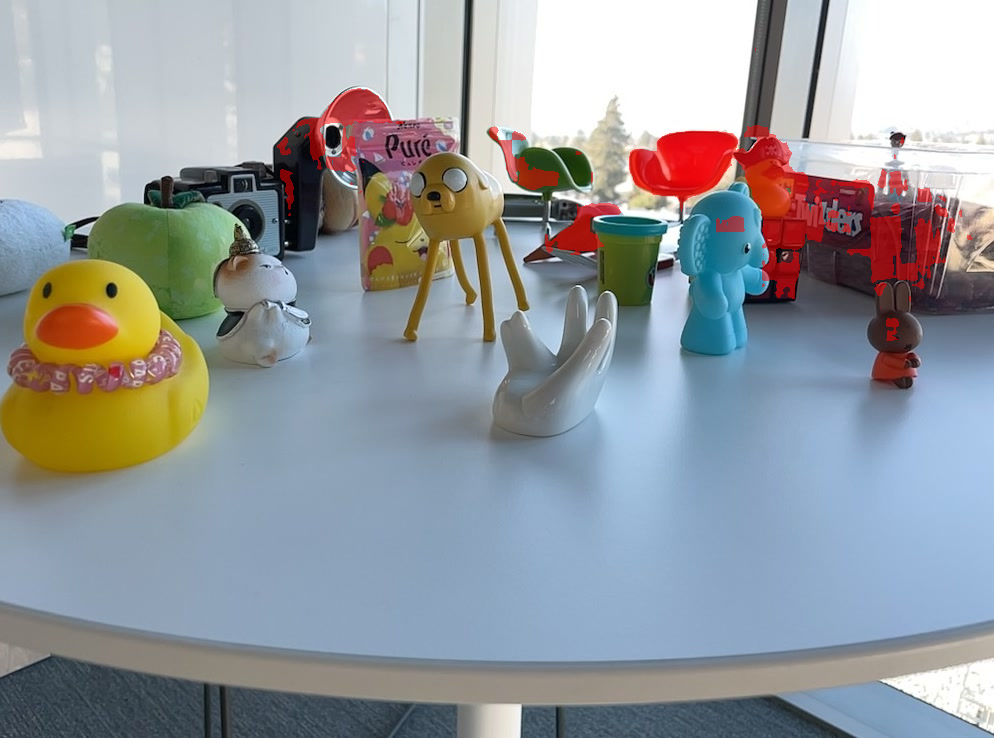

In [39]:
Image.fromarray(result_list[0])

In [2]:
from PIL import Image
import numpy as np

mask = np.array(Image.open('data/ovs3d/bed/segmentations/00/banana.png'))

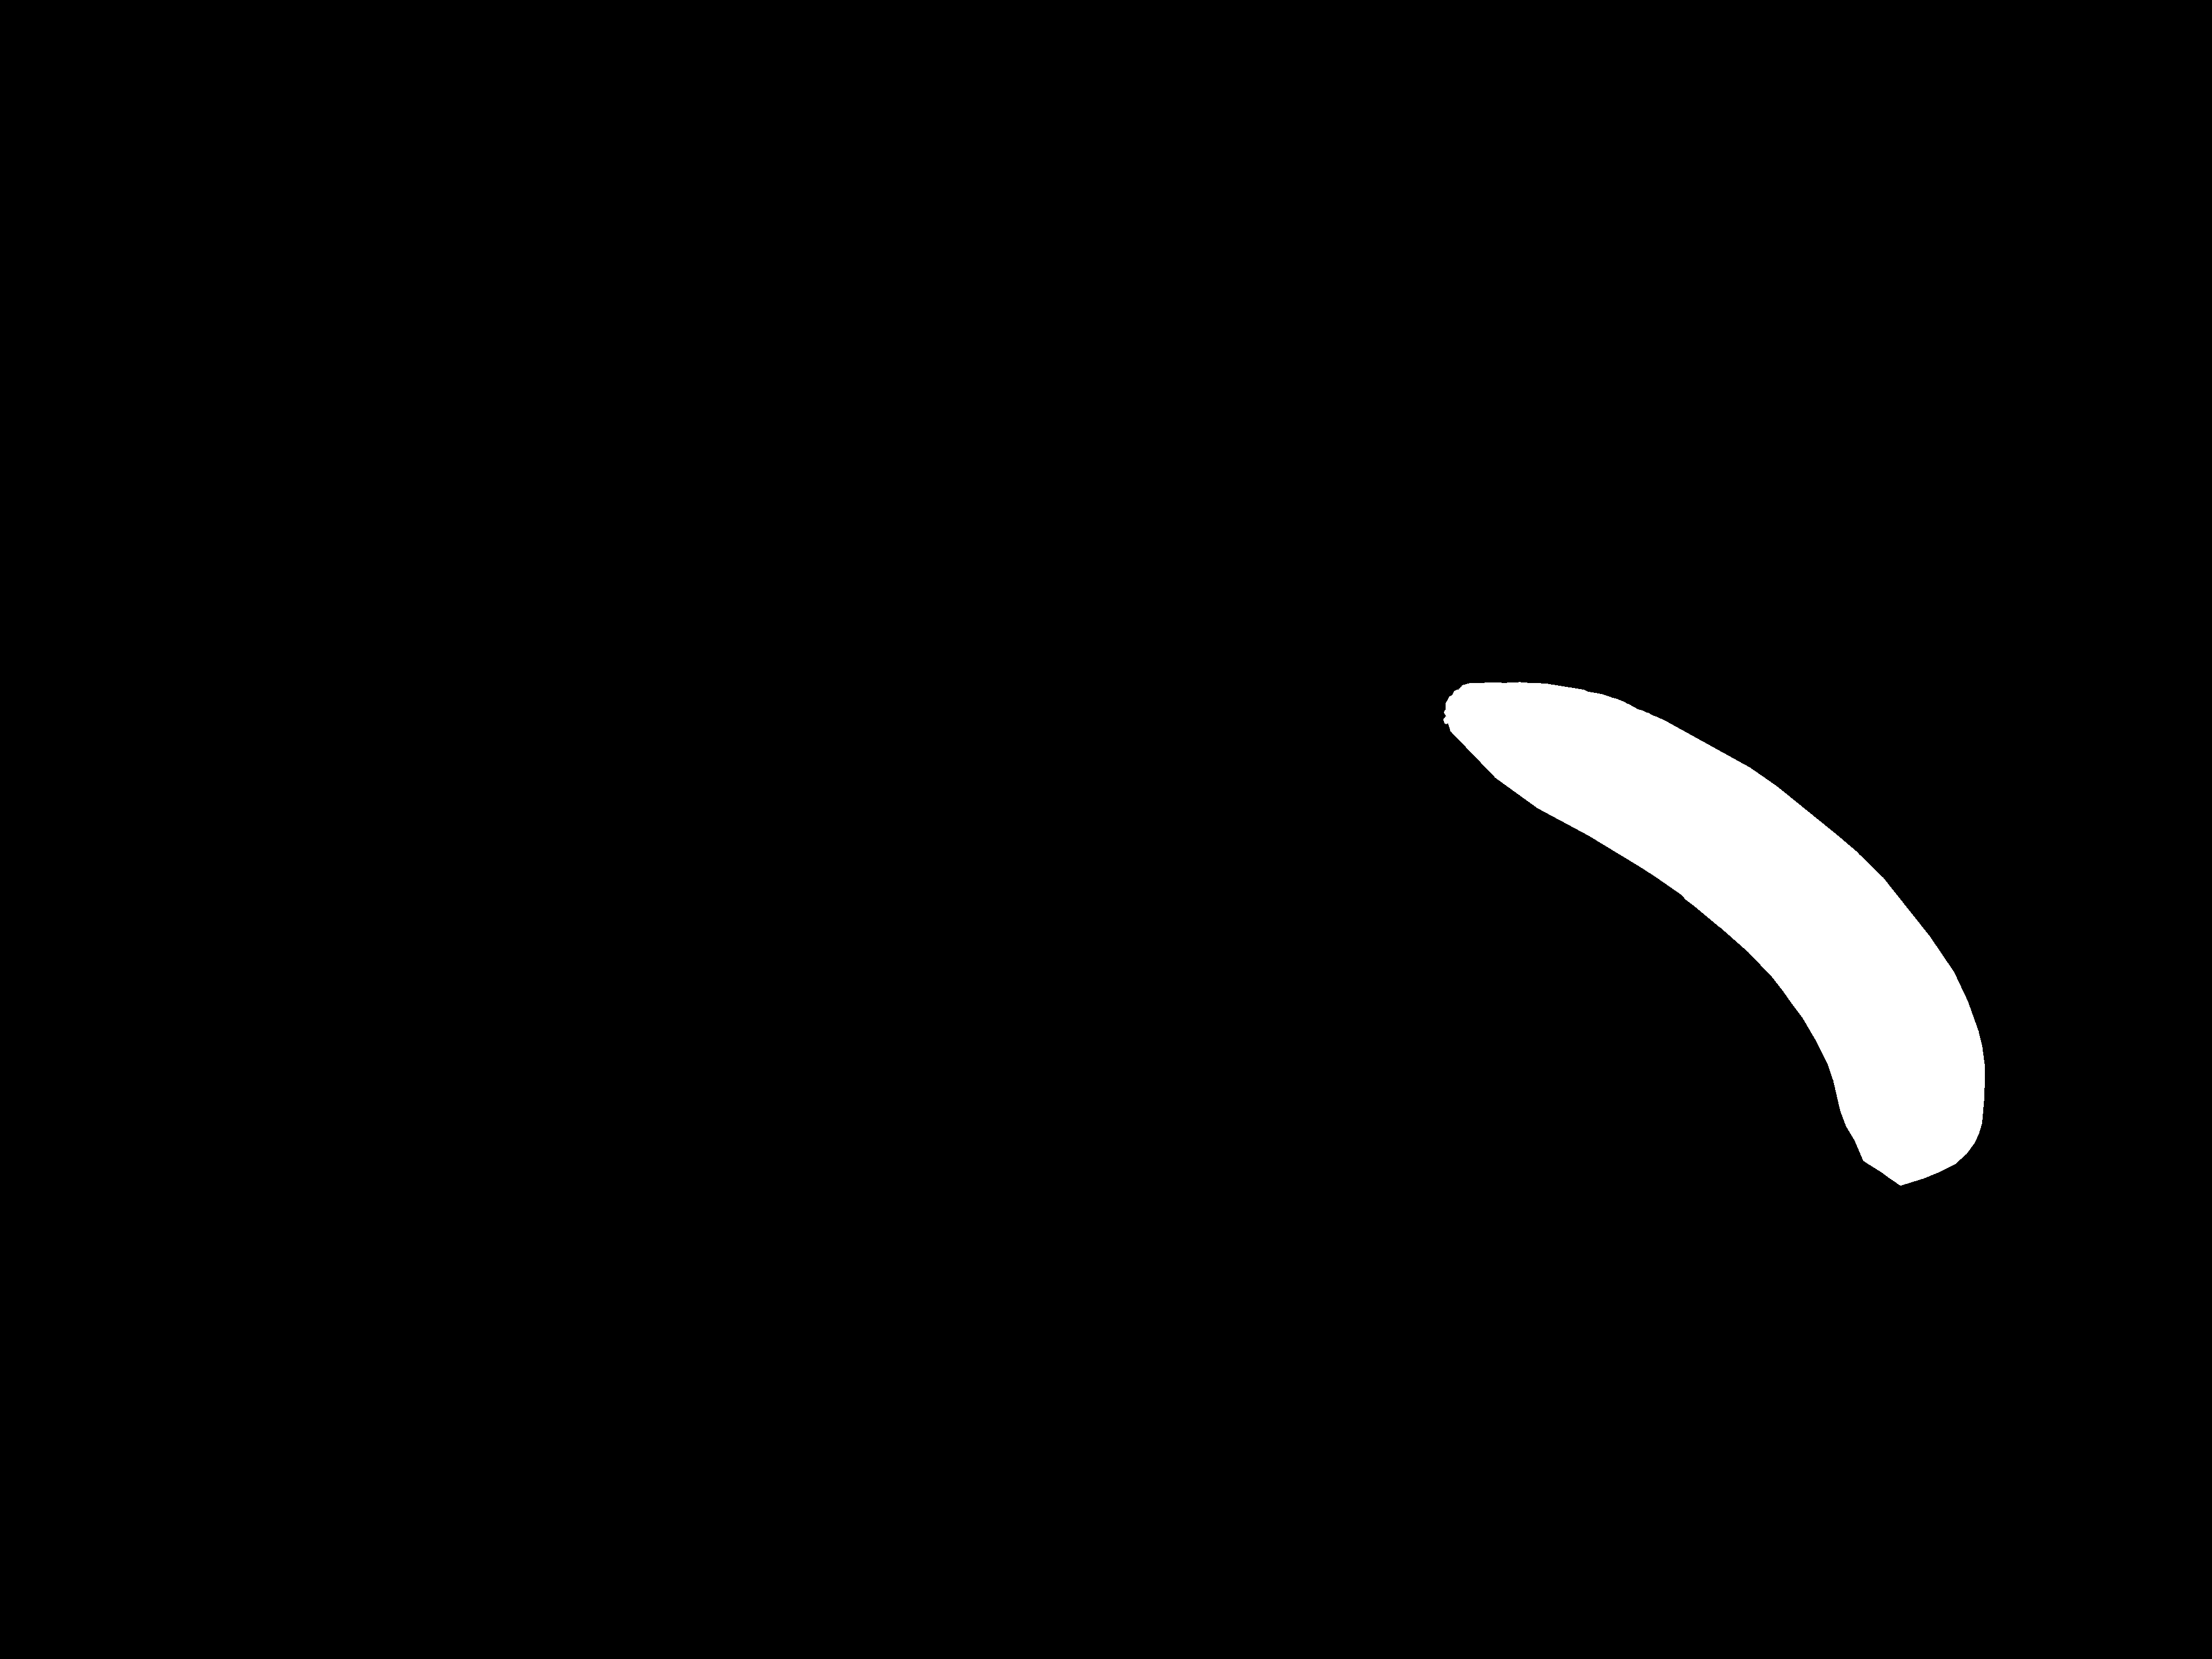

In [5]:
Image.fromarray(mask[..., 1])

In [1]:
import numpy as np
data0 = np.load("data/nerf_llff_data/fern/masks_4_bak.npz", allow_pickle=True)['arr_0'].tolist()
data1 = np.load("data/nerf_llff_data/fern/masks_4.npz", allow_pickle=True)['arr_0'].tolist()

In [3]:
data0['clip_embeddings']


tensor([[-0.0762,  0.0387,  0.0128,  ..., -0.0041, -0.0421,  0.0191],
        [-0.0236,  0.0532, -0.0014,  ..., -0.0499, -0.0113,  0.0258],
        [-0.0670,  0.0262, -0.0042,  ..., -0.0072, -0.0477,  0.0096],
        ...,
        [-0.0403, -0.0014, -0.0152,  ..., -0.0536, -0.0237,  0.0604],
        [-0.0309, -0.0328, -0.0122,  ..., -0.0247,  0.0029,  0.0713],
        [-0.0269,  0.0552, -0.0201,  ..., -0.0583, -0.0537,  0.0267]],
       device='cuda:0', dtype=torch.float16)

In [4]:
data1["aggregation_clip_embeddings"]

tensor([[ 0.0629, -0.0478, -0.0943,  ...,  0.0510,  0.0262, -0.0067],
        [ 0.0202,  0.0167, -0.0878,  ...,  0.0038, -0.0359,  0.0283],
        [-0.0136,  0.0120, -0.1113,  ..., -0.0403,  0.0335,  0.0578],
        ...,
        [ 0.0484, -0.0156, -0.0248,  ...,  0.0034,  0.0048,  0.0150],
        [-0.0069, -0.0038, -0.0160,  ...,  0.0288, -0.0051,  0.0077],
        [-0.0023,  0.0304,  0.0304,  ...,  0.0354, -0.0105,  0.0276]],
       device='cuda:0')

In [1]:
import torch

a = torch.load("output/ovs3d/bench/point_cloud/iteration_10000/16_feature_gs_10000.pt")

In [2]:
a

{'gs_features': array([[ 0.27904972,  0.8930701 , -1.1052698 , ...,  0.7933227 ,
         -0.00974642,  1.0317091 ],
        [-0.3934274 ,  0.29263818, -1.1054645 , ..., -0.8375682 ,
          0.11743997,  0.53425366],
        [-0.6068123 ,  0.8523468 ,  0.07969417, ..., -0.2710914 ,
         -0.25360015,  0.5925773 ],
        ...,
        [-0.44785383, -0.4744221 , -0.662439  , ...,  0.02309205,
         -0.65706915,  0.20881392],
        [-0.41245383,  1.5348461 ,  0.86344343, ..., -0.9362031 ,
          0.9971108 ,  1.6817952 ],
        [-1.137279  ,  0.9125236 ,  0.26407823, ...,  0.71187544,
         -0.47281536,  0.97655433]], dtype=float32),
 'instance_embeddings': array([[-1.07436702e-01, -2.13010348e-02, -3.04190397e-01,
         -9.70870927e-02,  3.35999541e-02,  3.66504118e-02,
         -3.16759758e-02,  1.01053171e-01, -2.23598942e-01,
         -2.63159901e-01, -1.68960333e-01,  1.18707970e-01,
          7.50901327e-02,  1.50952354e-01, -2.87333846e-01,
         -1.04006685

In [4]:
import os
from PIL import Image
import numpy as np

def load_mask(mask_path):
    """Load the mask from the given path."""
    if os.path.exists(mask_path):
        return np.array(Image.open(mask_path).convert('L'))  # Convert to grayscale
    return None
mask = load_mask("data/gsgrouping/figurines/test_mask/0/green apple.png")

In [5]:
mask.shape

(728, 986)

In [9]:
mask.min()

0

In [1]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
model = BertModel.from_pretrained("huawei-noah/TinyBERT_General_4L_312D")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

/media/guest/Elephant/conda_space/envs/3dgs/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/media/guest/Elephant/conda_space/envs/3dgs/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [2]:
output.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [3]:
output['pooler_output'].shape

torch.Size([1, 312])